# Predict  has the client subscribed a term deposit? 

# Bank Marketing Analysis

In [1]:
import pandas as pd
import numpy as np

# Reading Train dataset

In [2]:
df=pd.read_csv("bankTrain.csv")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,blue-collar,divorced,secondary,no,644,no,yes,cellular,17,nov,220,4,109,4,failure,no
1,52,admin.,married,primary,no,208,yes,no,cellular,17,apr,377,2,-1,0,unknown,no
2,34,technician,married,secondary,no,1641,yes,no,cellular,17,apr,380,1,-1,0,unknown,no
3,57,services,married,secondary,no,1433,no,no,telephone,21,nov,41,1,-1,0,unknown,no
4,57,technician,married,tertiary,no,2887,yes,no,cellular,11,feb,123,1,-1,0,unknown,no


In [3]:
df['job'] = df['job'].str.replace('"', '')
df['marital'] = df['marital'].str.replace('"', '')
df['education'] = df['education'].str.replace('"', '')
df['default'] = df['default'].str.replace('"', '')
df['housing'] = df['housing'].str.replace('"', '')
df['loan'] = df['loan'].str.replace('"', '')
df['contact'] = df['contact'].str.replace('"', '')
df['month'] = df['month'].str.replace('"', '')
df['poutcome'] = df['poutcome'].str.replace('"', '')
df['y'] = df['y'].str.replace('"', '')


In [4]:
df.head(40)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,blue-collar,divorced,secondary,no,644,no,yes,cellular,17,nov,220,4,109,4,failure,no
1,52,admin.,married,primary,no,208,yes,no,cellular,17,apr,377,2,-1,0,unknown,no
2,34,technician,married,secondary,no,1641,yes,no,cellular,17,apr,380,1,-1,0,unknown,no
3,57,services,married,secondary,no,1433,no,no,telephone,21,nov,41,1,-1,0,unknown,no
4,57,technician,married,tertiary,no,2887,yes,no,cellular,11,feb,123,1,-1,0,unknown,no
5,49,management,married,tertiary,no,470,no,no,cellular,18,nov,79,1,-1,0,unknown,no
6,37,services,single,secondary,no,459,no,no,telephone,16,jul,61,14,-1,0,unknown,no
7,33,blue-collar,single,secondary,no,-320,no,no,cellular,18,may,268,2,-1,0,unknown,no
8,31,blue-collar,married,secondary,no,2289,yes,yes,cellular,20,apr,79,1,151,1,failure,no
9,58,technician,married,tertiary,no,12322,no,no,telephone,2,jun,306,2,-1,0,unknown,no


# Data description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
age          10000 non-null int64
job          10000 non-null object
marital      10000 non-null object
education    10000 non-null object
default      10000 non-null object
balance      10000 non-null int64
housing      10000 non-null object
loan         10000 non-null object
contact      10000 non-null object
day          10000 non-null int64
month        10000 non-null object
duration     10000 non-null int64
campaign     10000 non-null int64
pdays        10000 non-null int64
previous     10000 non-null int64
poutcome     10000 non-null object
y            10000 non-null object
dtypes: int64(7), object(10)
memory usage: 1.3+ MB


In [6]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,10000.000000,10000,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2189,6124,5172,9825,NaN,5568,8336,6464,NaN,2978,NaN,NaN,NaN,NaN,8174,8854
mean,40.914300,NaN,NaN,NaN,NaN,1365.599100,NaN,NaN,NaN,15.786500,NaN,257.606100,2.764400,39.718700,0.579000,NaN,NaN
std,10.611966,NaN,NaN,NaN,NaN,3201.201783,NaN,NaN,NaN,8.353149,NaN,252.880223,3.043817,99.056909,1.853996,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,182.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1404.250000,NaN,NaN,NaN,21.000000,NaN,320.000000,3.000000,-1.000000,0.000000,NaN,NaN


# Checking for values that are null

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Data Visualization

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

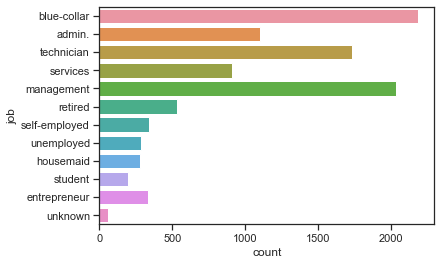

In [9]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=df)

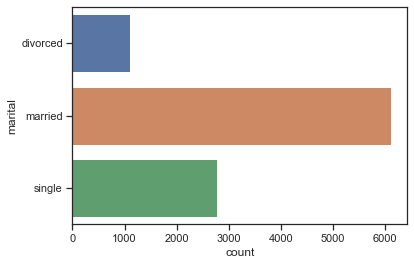

In [10]:
sns.countplot(y='marital', data=df)

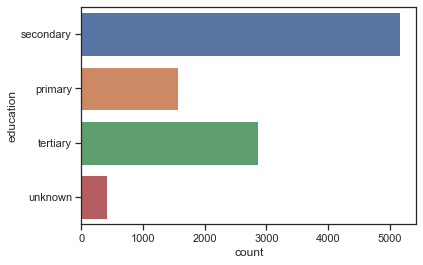

In [11]:
sns.countplot(y='education', data=df)

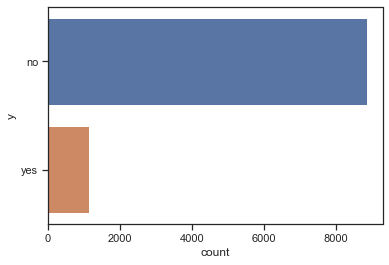

In [12]:
sns.countplot(y='y', data=df)

# Checking outliers using boxplots

In [13]:
data = df

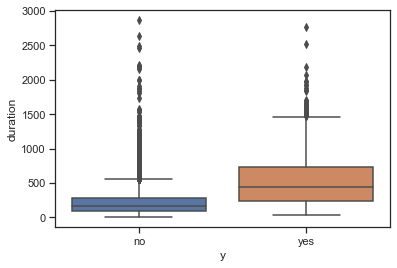

In [14]:
sns.boxplot(x='y', y='duration', data=data)

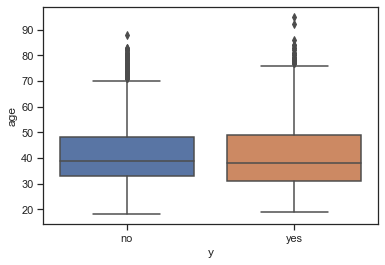

In [15]:
sns.boxplot(data['y'],data['age'])

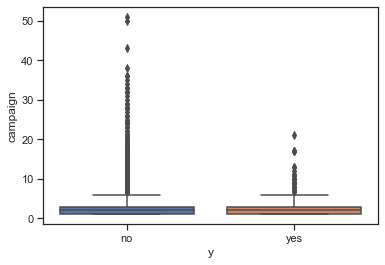

In [16]:
sns.boxplot(data['y'],data['campaign'])

# Removing outliers

In [17]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [18]:
min_val = data["duration"].min()
max_val = 1500
data = remove_outliers(df=data, column='duration' , minimum=min_val, maximum=max_val)

min_val = data["age"].min()
max_val = 80
data = remove_outliers(df=data, column='age' , minimum=min_val, maximum=max_val)

min_val = data["campaign"].min()
max_val = 6
data = remove_outliers(df=data, column='campaign' , minimum=min_val, maximum=max_val)

# Dropping Useless Columns by having Visuals

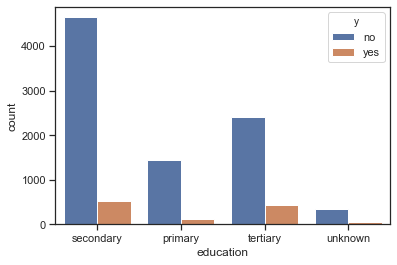

In [19]:
sns.countplot(x='education',hue='y',data=data)

Useful

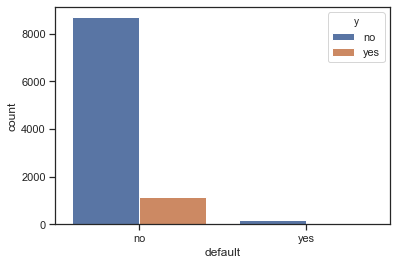

In [20]:
sns.countplot(x='default',hue='y',data=data)

useless

In [21]:
data = data.drop('default',axis=1) #defaultdropped

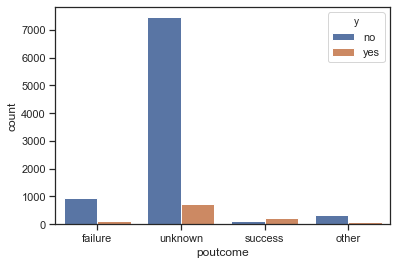

In [22]:
sns.countplot(x='poutcome',hue='y',data=data)

uselesss So many non existent values. We can drop thi

In [23]:
data = data.drop('poutcome',axis=1)

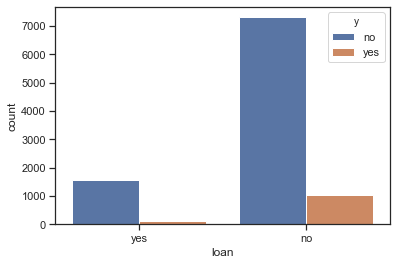

In [24]:
sns.countplot(x='loan',hue='y',data=data)

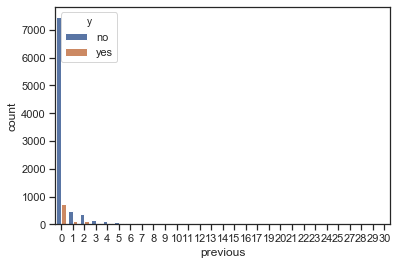

In [25]:
sns.countplot(x='previous',hue='y',data=data)

In [26]:
data = data.drop('previous',axis=1)

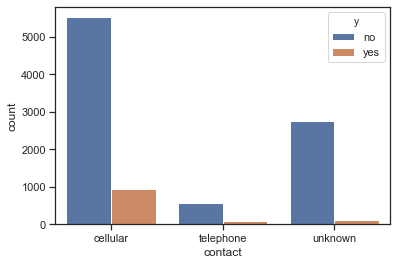

In [27]:
sns.countplot(x='contact',hue='y',data=data)

In [28]:
data = data.drop('contact',axis=1)

In [29]:
data.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,y
0,58.0,blue-collar,divorced,secondary,644,no,yes,17,nov,220.0,4.0,109,no
1,52.0,admin.,married,primary,208,yes,no,17,apr,377.0,2.0,-1,no
2,34.0,technician,married,secondary,1641,yes,no,17,apr,380.0,1.0,-1,no
3,57.0,services,married,secondary,1433,no,no,21,nov,41.0,1.0,-1,no
4,57.0,technician,married,tertiary,2887,yes,no,11,feb,123.0,1.0,-1,no


# Preprocessing the data for training and testing  (Encoding Features)

In [32]:
from sklearn import preprocessing

# LabelEncoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
data['job'].unique()

array(['blue-collar', 'admin.', 'technician', 'services', 'management',
       'retired', 'self-employed', 'unemployed', 'housemaid', 'student',
       'entrepreneur', 'unknown'], dtype=object)

In [35]:
lb = LabelEncoder()
lb.fit(['blue-collar', 'admin.', 'technician', 'services', 'management',
       'retired', 'self-employed', 'unemployed', 'housemaid', 'student',
       'entrepreneur', 'unknown'])
data['job'] = lb.transform(data['job'])

In [36]:
data['marital'].unique()

array(['divorced', 'married', 'single'], dtype=object)

In [37]:
lb = LabelEncoder()
lb.fit(['divorced', 'married', 'single'])
data['marital'] = lb.transform(data['marital'])

In [38]:
data['education'].unique()

array(['secondary', 'primary', 'tertiary', 'unknown'], dtype=object)

In [39]:
lb = LabelEncoder()
lb.fit(['secondary', 'primary', 'tertiary', 'unknown'])
data['education'] = lb.transform(data['education'])

In [40]:
data['housing'].unique()

array(['no', 'yes'], dtype=object)

In [41]:
lb = LabelEncoder()
lb.fit(['no', 'yes'])
data['housing'] = lb.transform(data['housing'])

In [42]:
data['loan'].unique()

array(['yes', 'no'], dtype=object)

In [43]:
lb = LabelEncoder()
lb.fit(['yes', 'no'])
data['loan'] = lb.transform(data['loan'])

In [44]:
data['month'].unique()

array(['nov', 'apr', 'feb', 'jul', 'may', 'jun', 'aug', 'jan', 'oct',
       'mar', 'sep', 'dec'], dtype=object)

In [45]:
lb = LabelEncoder()
lb.fit(['nov', 'apr', 'feb', 'jul', 'may', 'jun', 'aug', 'jan', 'oct',
       'mar', 'sep', 'dec'])
data['month'] = lb.transform(data['month'])

In [46]:
data.head(40)

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,y
0,58.0,1,0,1,644,0,1,17,9,220.0,4.0000,109,no
1,52.0,0,1,0,208,1,0,17,0,377.0,2.0000,-1,no
2,34.0,9,1,1,1641,1,0,17,0,380.0,1.0000,-1,no
3,57.0,7,1,1,1433,0,0,21,9,41.0,1.0000,-1,no
4,57.0,9,1,2,2887,1,0,11,3,123.0,1.0000,-1,no
5,49.0,4,1,2,470,0,0,18,9,79.0,1.0000,-1,no
6,37.0,7,2,1,459,0,0,16,5,61.0,2.7644,-1,no
7,33.0,1,2,1,-320,0,0,18,8,268.0,2.0000,-1,no
8,31.0,1,1,1,2289,1,1,20,0,79.0,1.0000,151,no
9,58.0,9,1,2,12322,0,0,2,6,306.0,2.0000,-1,no


# Splitting dataset in to training and testing data

In [47]:
X = data.drop('y',axis = 1).values
y = data['y'].values

In [48]:
from sklearn.model_selection import train_test_split

# 80% Train, 10% Validation, %10 Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 10000
Total # of sample in train dataset: 8000
Total # of sample in validation dataset: 1000
Total # of sample in test dataset: 1000


# Scalar

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

# PCA

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [52]:
X_train.shape

(8000, 10)

In [53]:
X_test.shape

(1000, 12)

# Building different Models

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [55]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('Decison-Tree', DecisionTreeClassifier()))

# validating using 10 fold cross validation with classifiers

In [57]:
from sklearn import model_selection

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

/Users/malik96/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/malik96/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/malik96/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/malik96/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/malik96/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

LR: 0.8927499999999998
LDA: 0.8895
KNN: 0.892
Gaussian: 0.884625
Decison-Tree: 0.850875


# Logistic Regression has the highest accuracy of 89.27 %

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)


/Users/malik96/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
model.fit(X, y)

/Users/malik96/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Now Bringing Test Dataset for predicting ("y") in our test dataset which is not labeled

In [60]:
test = pd.read_csv("banktest.csv")

In [61]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,39,unemployed,single,secondary,no,356,yes,no,unknown,30,may,462,2,-1,0,unknown
1,46,management,single,tertiary,yes,-344,no,no,cellular,8,aug,142,4,-1,0,unknown
2,35,management,single,tertiary,no,560,yes,no,unknown,6,may,181,1,-1,0,unknown
3,27,services,married,secondary,no,0,yes,no,unknown,15,may,312,6,-1,0,unknown
4,56,technician,married,secondary,no,2558,no,no,unknown,19,jun,288,1,-1,0,unknown


# dropping unnecessary features

In [62]:
test = test.drop(['default','poutcome','previous','contact',], axis=1) 

In [63]:
test.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays
0,39,unemployed,single,secondary,356,yes,no,30,may,462,2,-1
1,46,management,single,tertiary,-344,no,no,8,aug,142,4,-1
2,35,management,single,tertiary,560,yes,no,6,may,181,1,-1
3,27,services,married,secondary,0,yes,no,15,may,312,6,-1
4,56,technician,married,secondary,2558,no,no,19,jun,288,1,-1


# Adding empty Y colomn

In [64]:
#test = test.reindex(columns = test.columns.tolist() + ['y'])

In [65]:
test.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays
0,39,unemployed,single,secondary,356,yes,no,30,may,462,2,-1
1,46,management,single,tertiary,-344,no,no,8,aug,142,4,-1
2,35,management,single,tertiary,560,yes,no,6,may,181,1,-1
3,27,services,married,secondary,0,yes,no,15,may,312,6,-1
4,56,technician,married,secondary,2558,no,no,19,jun,288,1,-1


# Encoding features

In [66]:
test["job"].fillna("Null", inplace = True) #replacing Null with NaN
lb = LabelEncoder()
lb.fit(['blue-collar', 'admin.', 'technician', 'services', 'management',
       'retired', 'self-employed', 'unemployed', 'housemaid', 'student',
       'entrepreneur', 'unknown'])
test['job'] = lb.transform(test['job'])

In [67]:
test["marital"].fillna("Null", inplace = True) #replacing Null with NaN
lb = LabelEncoder()
lb.fit(['divorced', 'married', 'single'])
test['marital'] = lb.transform(test['marital'])

In [68]:
test["education"].fillna("Null", inplace = True) #replacing Null with NaN
lb = LabelEncoder()
lb.fit(['secondary', 'primary', 'tertiary', 'unknown'])
test['education'] = lb.transform(test['education'])

In [69]:
test["housing"].fillna("Null", inplace = True) #replacing Null with NaN
lb = LabelEncoder()
lb.fit(['no', 'yes'])
test['housing'] = lb.transform(test['housing'])

In [70]:
test["loan"].fillna("Null", inplace = True) #replacing Null with NaN
lb = LabelEncoder()
lb.fit(['yes', 'no'])
test['loan'] = lb.transform(test['loan'])

In [71]:
test["month"].fillna("Null", inplace = True) #replacing Null with NaN
lb = LabelEncoder()
lb.fit(['nov', 'apr', 'feb', 'jul', 'may', 'jun', 'aug', 'jan', 'oct',
       'mar', 'sep', 'dec'])
test['month'] = lb.transform(test['month'])

In [72]:
test.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays
0,39,10,2,1,356,1,0,30,8,462,2,-1
1,46,4,2,2,-344,0,0,8,1,142,4,-1
2,35,4,2,2,560,1,0,6,8,181,1,-1
3,27,7,1,1,0,1,0,15,8,312,6,-1
4,56,9,1,1,2558,0,0,19,6,288,1,-1


In [73]:
pred = model.predict(test)

In [74]:
test['y'] = pred 

In [75]:
test.head(30)

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,y
0,39,10,2,1,356,1,0,30,8,462,2,-1,no
1,46,4,2,2,-344,0,0,8,1,142,4,-1,no
2,35,4,2,2,560,1,0,6,8,181,1,-1,no
3,27,7,1,1,0,1,0,15,8,312,6,-1,no
4,56,9,1,1,2558,0,0,19,6,288,1,-1,no
5,20,8,2,1,1191,0,0,28,11,500,2,228,yes
6,34,7,2,2,239,0,0,28,4,699,2,-1,yes
7,44,0,1,1,429,1,0,28,4,99,1,246,no
8,34,0,1,1,384,1,0,14,8,551,2,-1,no
9,46,3,1,1,1000,0,0,18,1,96,11,-1,no


# Inserting the prediction in test Dataset

In [76]:
pd.DataFrame(test).to_csv("banktest.csv")

In [77]:
your_preds= test

In [80]:
your_preds.head(20)

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,y
0,39,10,2,1,356,1,0,30,8,462,2,-1,no
1,46,4,2,2,-344,0,0,8,1,142,4,-1,no
2,35,4,2,2,560,1,0,6,8,181,1,-1,no
3,27,7,1,1,0,1,0,15,8,312,6,-1,no
4,56,9,1,1,2558,0,0,19,6,288,1,-1,no
5,20,8,2,1,1191,0,0,28,11,500,2,228,yes
6,34,7,2,2,239,0,0,28,4,699,2,-1,yes
7,44,0,1,1,429,1,0,28,4,99,1,246,no
8,34,0,1,1,384,1,0,14,8,551,2,-1,no
9,46,3,1,1,1000,0,0,18,1,96,11,-1,no


# this is SAVAS' part

In [ ]:
real_values=pd.read_csv("bankTestY.csv")

In [ ]:
real_values.head()

In [ ]:
your_preds==real_values

## your score

In [ ]:

q=your_preds==real_values
sum(list(q.iloc[:,0])), len(q)